# MushroomTastic

## Defending the world against nasty shrooms

> Using [data from kaggle].(https://www.kaggle.com/uciml/mushroom-classification) to determine if a mushroom is dangerous to eat

## 0. Import libraries
We'll _deffo_ need `pandas`, and a **few** more.  ~~strikethrough~~

In [36]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV
import graphviz
%matplotlib inline

## 1. Source the data

In [5]:
df = pd.read_csv("data-sets/mushrooms.csv")

## 2. Explore the data

In [7]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
sns.countplot(class = "e")

SyntaxError: invalid syntax (<ipython-input-10-a29abdc9315c>, line 1)

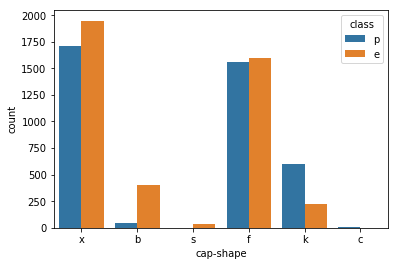

In [11]:
sns.countplot(x='cap-shape',hue = 'class', data = df)

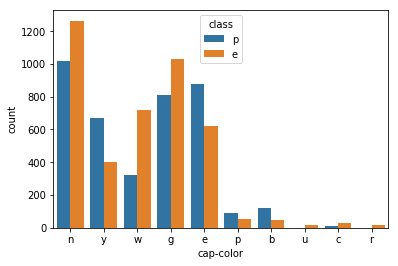

In [12]:
sns.countplot(x='cap-color',hue = 'class', data = df)

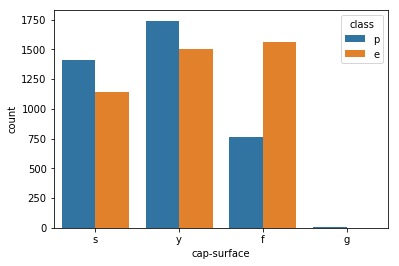

In [13]:
sns.countplot(x='cap-surface',hue = 'class', data = df)

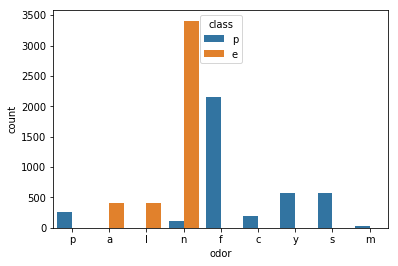

In [14]:
sns.countplot(x='odor',hue = 'class', data = df)

## 3. Build the model
It's going to be a **decision tree** as our data is _categorical_
to grow a decision tree, we need:
1) list of classes
2) array of data with mushroom info
Need to drop data the data that shouldn't be used (Odor and Class)

In [17]:
classes = df['class']

In [18]:
samples = df.drop(['class', 'odor'], axis =1)

In [19]:
samples.head()

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,f,c,n,k,e,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,f,c,b,k,e,c,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,f,c,b,n,e,c,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,f,c,n,n,e,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,f,w,b,k,t,e,...,s,w,w,p,w,o,e,n,a,g


In [20]:
samples = pd.get_dummies(samples)

In [21]:
samples.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(samples,classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
model.score(samples, classes)

1.0

In [30]:
train_test = cross_val_score(model, samples, classes, cv = 5)
print(train_test)

[0.73370234 0.99076923 0.95938462 0.99938424 0.86761084]


visualise the tree using `graphviz`

In [34]:
def plotTree():
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=samples.columns,
                                    filled=True, 
                                    rounded=True,  
                                    class_names=model.classes_,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph 

In [37]:
plotTree()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH